# Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

using: ['Lemonade'](https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv)

0. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

1. Using lemonade.csv dataset and focusing on continuous variables:

- a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- b. Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- c. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
- d. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- a. Use a 2 sigma decision rule to isolate the outliers.
- b. Do these make sense?
- c. Should certain outliers be kept or removed?

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

<hr style="border:2px solid black"> </hr>

In [2]:
#read in the clipboard from webpage
#column seperator is the comma
df = pd.read_clipboard(sep = ',')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
#change the dtype
df.Date = pd.to_datetime(df.Date)

In [6]:
#set Date as index
df = df.set_index('Date')

In [7]:
#create month and year columns to better understand data
df['Month'] = df.index.month_name()
df['Year'] = df.index.year

In [8]:
#take a look
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,2017
2017-01-02,Monday,28.9,1.33,15,0.5,13,January,2017
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January,2017
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January,2017
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January,2017


In [9]:
#look at dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
 6   Month        365 non-null    object 
 7   Year         365 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 25.7+ KB


____________________________________________

### 0: create a function

In [10]:
#function that prints lower and upper bounds
def get_lower_and_upper_bounds(df, variable, multiplier):
    '''
    This function takes in df, desired variable, and multiplier
    and outputs the calculated lower and upper bound to locate outliers in variables
    additionally, a boxplot and histplot are created
    '''
    q1, q3 = np.percentile(df[variable], [25,75])
    iqr = q3 - q1
    lower_bound = (round(q1 - (multiplier * iqr),2))
    upper_bound = q3 + (multiplier * iqr)
    
    #print upper and lower bounds
    print(f'Using {variable}:')
    print(f'the lower bound is: {lower_bound}')  
    print(f'the upper bound is: {upper_bound}')
    
    #create plots
    plt.figure(figsize=(16,4))
    plt.subplot(1, 2, 1)
    #histplot
    sns.histplot(data = df, x = variable, kde=True)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    #boxplot
    sns.boxplot(x=variable, data=df)
    plt.axvline(lower_bound, color='red')
    plt.axvline(upper_bound, color='red')
    plt.title(variable)
    plt.show()

______________________________________________

### 1 Using lemonade.csv dataset and focusing on continuous variables:

#### 1a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. 
<br>

- Do these lower outliers make sense?
    - Answer: no
        - cannot pass out -40 flyers
        - prices are all $0.50
        
<br>    

- Which outliers should be kept?

Using Temperature:
the lower bound is: 16.7
the upper bound is: 104.7


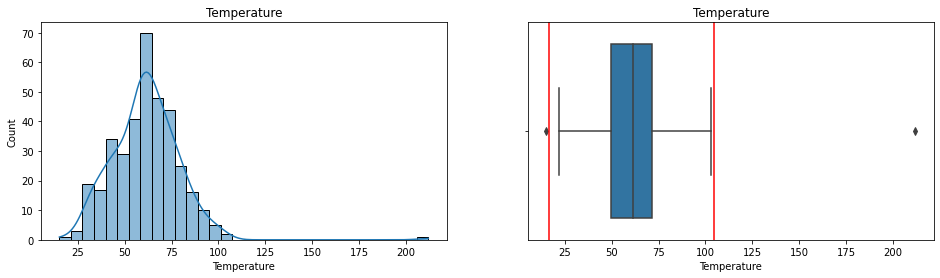

In [11]:
get_lower_and_upper_bounds(df, 'Temperature', 1.5)

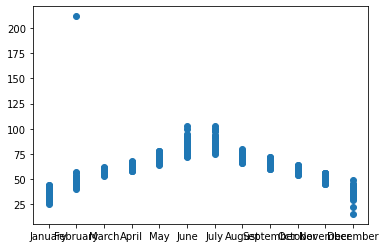

In [12]:
#look further into that hot day
plt.scatter(df.Month, df.Temperature)

#not very likely that it be 'that' hot in february

In [13]:
#look at specific days where temp were outliers
df[df['Temperature'] > 104]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,2017


Using Rainfall:
the lower bound is: 0.26
the upper bound is: 1.3


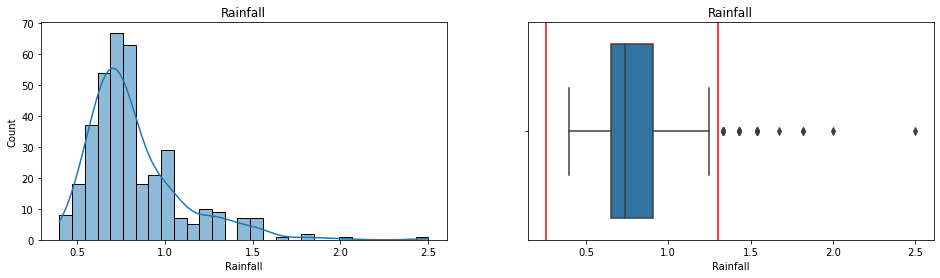

In [14]:
get_lower_and_upper_bounds(df, 'Rainfall', 1.5)

Using Flyers:
the lower bound is: 4.0
the upper bound is: 76.0


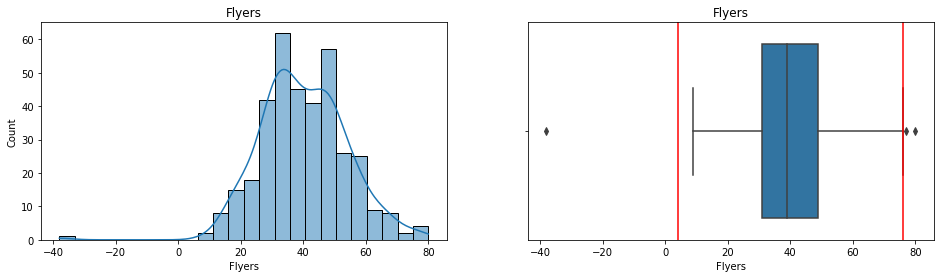

In [15]:
get_lower_and_upper_bounds(df, 'Flyers', 1.5)

Using Price:
the lower bound is: 0.5
the upper bound is: 0.5


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


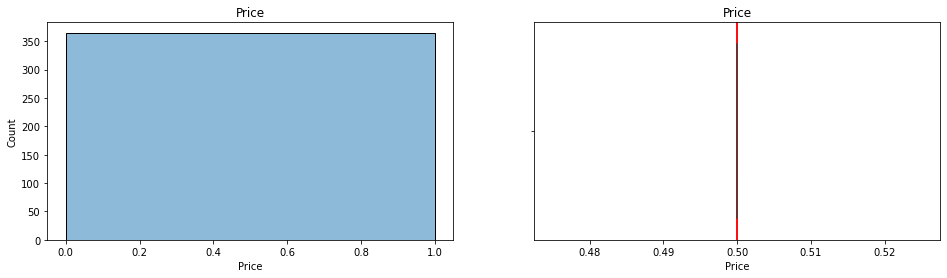

In [16]:
get_lower_and_upper_bounds(df, 'Price', 1.5)

Using Sales:
the lower bound is: 5.0
the upper bound is: 45.0


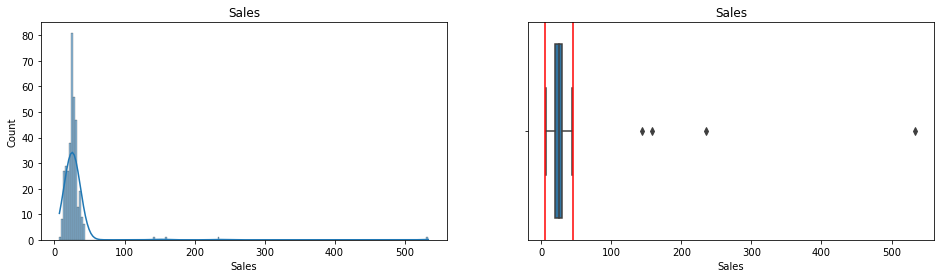

In [17]:
get_lower_and_upper_bounds(df, 'Sales', 1.5)

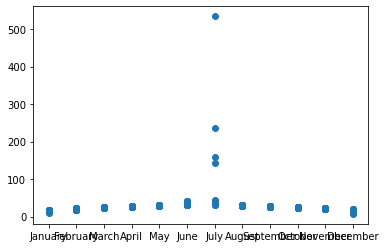

In [18]:
#look into that high sell period
plt.scatter(df.Month, df.Sales)

#looks like high sales were in july!
#hot months and july 4 holiday so it is possible

In [19]:
#look at specific days where sales were outliers
df[df['Sales'] > 45]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year
Date,,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July,2017
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July,2017
2017-07-03,Monday,81.5,0.54,68,0.5,235,July,2017
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July,2017


In [20]:
#lowest sales of the year makes sense
df[df['Sales'] == 7]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year
Date,,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December,2017


_______________________

#### 1b. Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. 

<br>

- Do these upper outliers make sense?
    - temperature cannot be 200+ degrees
    
<br>
    
- Which outliers should be kept?
    - Sales upper outlier- $500 in sales could be interesting
    - Flyers upper outlier- passing out 80 flyers?

In [ ]:
## see above 1a for visuals and upper outlier numbers

_____________________________

#### 1c. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. 
<br>

- Do these lower outliers make sense?
    - Answer: no
        - cannot pass out -23 flyers
        - cannot make -$10
        - cannot rain -13 units

<br>

- Which outliers should be kept?
    - Answer:
        - Temperature
        - Price

Using Temperature:
the lower bound is: -16.3
the upper bound is: 137.7


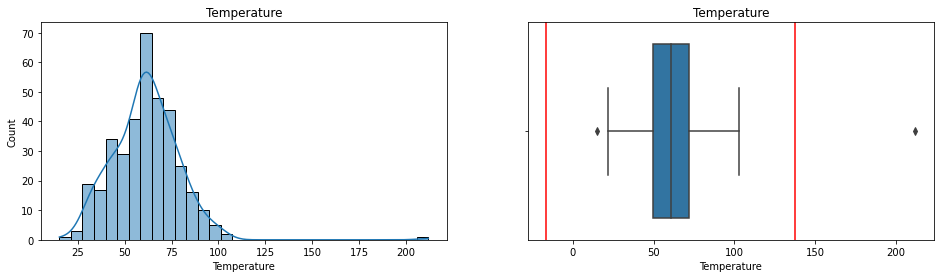

In [21]:
get_lower_and_upper_bounds(df, 'Temperature', 3.0)

Using Rainfall:
the lower bound is: -0.13
the upper bound is: 1.69


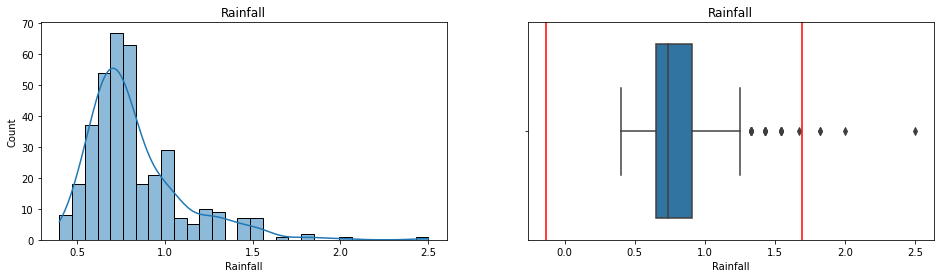

In [22]:
get_lower_and_upper_bounds(df, 'Rainfall', 3.0)

Using Flyers:
the lower bound is: -23.0
the upper bound is: 103.0


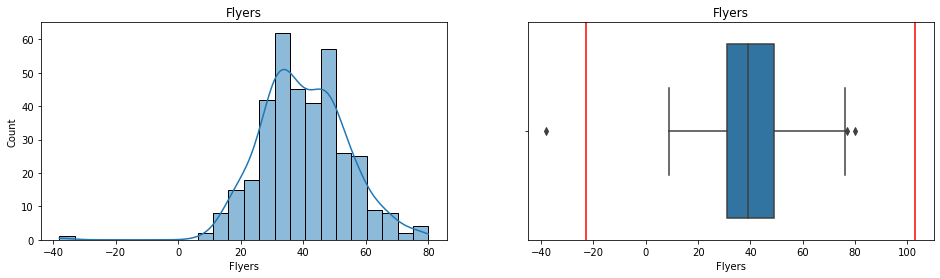

In [23]:
get_lower_and_upper_bounds(df, 'Flyers', 3.0)

In [24]:
df.Flyers.min()

-38

Using Price:
the lower bound is: 0.5
the upper bound is: 0.5


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


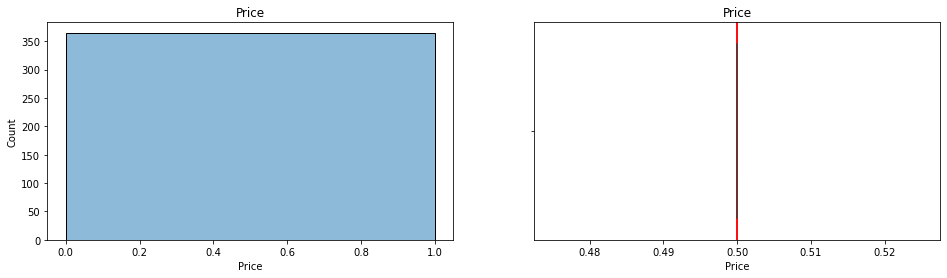

In [25]:
get_lower_and_upper_bounds(df, 'Price', 3.0)

Using Sales:
the lower bound is: -10.0
the upper bound is: 60.0


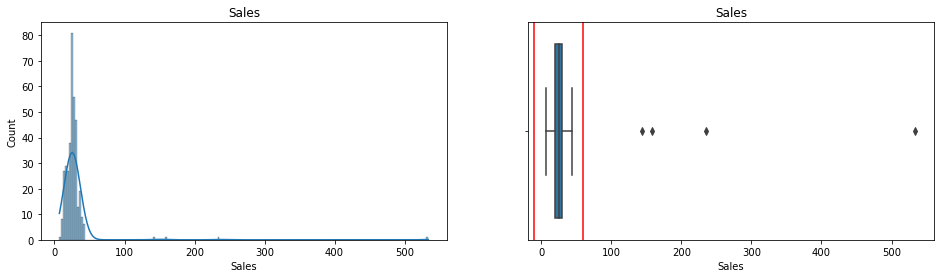

In [26]:
get_lower_and_upper_bounds(df, 'Sales', 3.0)

___________________________

#### 1d. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. 
- Do these upper outliers make sense? 
    - Answer: no
        - temperature cannot be that high
    
- Which outliers should be kept?
    - Answer:
        - Flyers
        - Sales
        - Rainfall

In [ ]:
## see 1c for visuals and numeric infomation regarding upper bounds

In [27]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales,Year
count,365.000000,365.000000,365.000000,365.0,365.000000,365.0
mean,61.224658,0.825973,40.104110,0.5,27.865753,2017.0
std,18.085892,0.273890,13.786445,0.0,30.948132,0.0
min,15.100000,0.400000,-38.000000,0.5,7.000000,2017.0
25%,49.700000,0.650000,31.000000,0.5,20.000000,2017.0
50%,61.100000,0.740000,39.000000,0.5,25.000000,2017.0
75%,71.700000,0.910000,49.000000,0.5,30.000000,2017.0
max,212.000000,2.500000,80.000000,0.5,534.000000,2017.0


### Takeaways:
- **Temperature** 
    - upper outlier of 212 degrees isnt possible (drop)
        - it is likely a clerical error/noise
        - in February is was probably 21 degrees (typo)
    - lower outlier of 7 degrees is possible (keep)
    
    <br>
    
- **Rainfall**
    - both lower of 0.4 and upper of 2.5 are possible (keep)
    
    <br>
    
- **Flyers** 
    - lower outlier of -38 is not possible/noise (drop) 
    - upper outlier of 80 is interesting (keep)
    
    <br>
    
- **Price**
    - price stayed consistent at $0.50 
    - no outliers noted
    
    <br>
    
- **Sales** 
    - upper bound outlier was 4th of July weekend, so it is possible (keep)
    - lower outlier of 7 makes sense (keep)
        - was 15 degrees and rained
    

<hr style="border:2px solid black"> </hr>

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

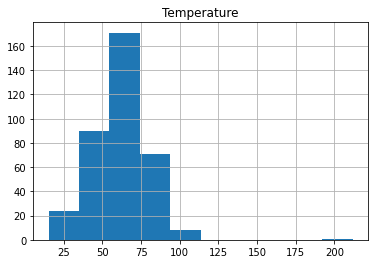

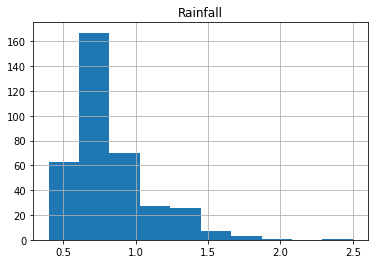

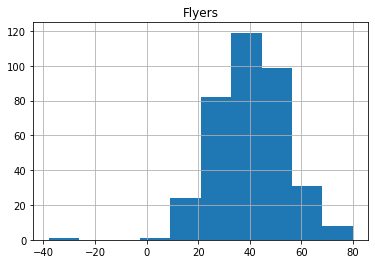

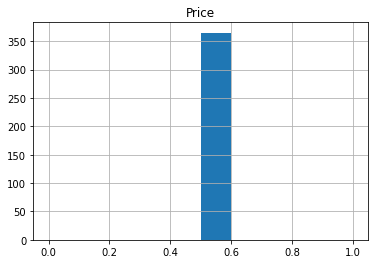

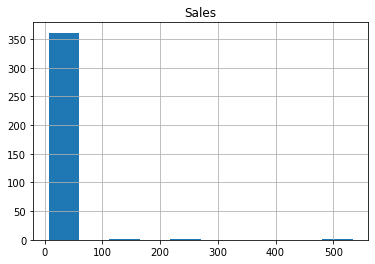

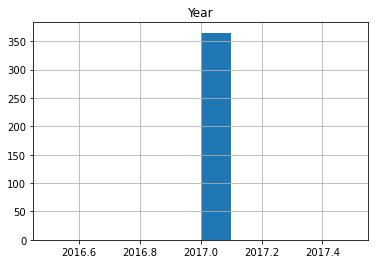

In [28]:
for col in df.columns:
    #determine if is numeric dtype
    if np.issubdtype(df[col].dtype, np.number):
        #histogram if it is numeric
        df[col].hist()
        plt.title(col)
        plt.show()

#### 2a. Use a 2 sigma decision rule to isolate the outliers.

In [29]:
#create column that shows zscore for flyers
df['zscore_flyer'] = (df.Flyers - df.Flyers.mean()) / df.Flyers.std()

In [30]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year,zscore_flyer
Date,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,2017,-1.820927
2017-01-02,Monday,28.9,1.33,15,0.5,13,January,2017,-1.820927
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January,2017,-0.950507
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January,2017,-0.877972
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January,2017,-0.515297


In [31]:
df[df.zscore_flyer.abs() > 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year,zscore_flyer
Date,,,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June,2017,2.676244
2017-06-20,Tuesday,85.1,0.54,70,0.5,37,June,2017,2.168499
2017-06-21,Wednesday,94.3,0.47,76,0.5,41,June,2017,2.603709
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July,2017,2.023429
2017-07-03,Monday,81.5,0.54,68,0.5,235,July,2017,2.023429
2017-07-14,Friday,92.0,0.50,80,0.5,40,July,2017,2.893849
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July,2017,2.603709
2017-07-23,Sunday,89.1,0.51,72,0.5,37,July,2017,2.313569
2017-07-24,Monday,83.5,0.57,69,0.5,35,July,2017,2.095964


__________________________________

#### 2b. Do these make sense?

________________________________________________

#### 2c. Should certain outliers be kept or removed?

________________________________________

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [ ]:
df[df.zscore_flyer.abs() > 2]